In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [27]:
url="https://www.hubertiming.com/results/2016MLK" #open link
html = urlopen(url)

In [28]:
soup = BeautifulSoup(html)

In [29]:
data = []
allrows= soup.find_all("tr")
for row in allrows :
    row_list = row.find_all("td")
    dataRow= []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
  
data = data[6:] 

In [30]:
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [31]:
df = pd.DataFrame(data)

In [32]:
df.columns = header_list
print(df.head())

  Place  Bib              Name Gender Age       City State Chip Time  \
0     2  267  WILFREDO BENITEZ      M  25   PORTLAND    OR     17:08   
1     3  253        DAN FRANEK      M  50        PDX    OR     17:33   
2     4  236        SKY NELSON      M  22   PORTLAND    OR     19:01   
3     5  249       ARI ELLIOTT      M  17  VANCOUVER    WA     19:16   
4     6  160      STEPHEN MERZ      M  35   PORTLAND    OR     19:34   

  Chip Pace Gender Place       Age Group Age Group Place Time to Start  \
0      5:31      2 of 40         M 21-39         2 of 15          0:05   
1      5:39      3 of 40         M 40-54         1 of 12          0:04   
2      6:08      4 of 40         M 21-39         3 of 15          0:15   
3      6:13      5 of 40  M 20 and Under          1 of 6          0:06   
4      6:18      6 of 40         M 21-39         4 of 15          0:06   

  Gun Time  
0    17:13  
1    17:37  
2    19:16  
3    19:22  
4    19:40  


In [33]:
df.shape

(115, 14)

In [34]:
df2 = df.dropna(how='any')
df.shape

(115, 14)

In [35]:
df2['Year'] = 2016

In [36]:
df2['Chip Time'] = df2['Chip Time'].apply(lambda x : x.rjust(5, '0').rjust(6, ':').rjust(8, '0'))
df2['ChipTime_minutes'] = df['Chip Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [37]:
time_list = df2['Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [38]:
df2['Runner_mins'] = time_mins
df2.head(5)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Year,ChipTime_minutes,Runner_mins
0,2,267,WILFREDO BENITEZ,M,25,PORTLAND,OR,00:17:08,5:31,2 of 40,M 21-39,2 of 15,0:05,17:13,2016,1028,17.133333
1,3,253,DAN FRANEK,M,50,PDX,OR,00:17:33,5:39,3 of 40,M 40-54,1 of 12,0:04,17:37,2016,1053,17.550000
2,4,236,SKY NELSON,M,22,PORTLAND,OR,00:19:01,6:08,4 of 40,M 21-39,3 of 15,0:15,19:16,2016,1141,19.016667
3,5,249,ARI ELLIOTT,M,17,VANCOUVER,WA,00:19:16,6:13,5 of 40,M 20 and Under,1 of 6,0:06,19:22,2016,1156,19.266667
4,6,160,STEPHEN MERZ,M,35,PORTLAND,OR,00:19:34,6:18,6 of 40,M 21-39,4 of 15,0:06,19:40,2016,1174,19.566667


Text(0.5, 1.0, 'Comparsion of average minutes run by male and female')

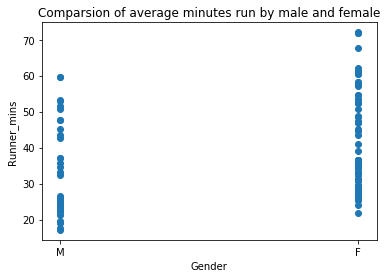

In [39]:
plt.scatter(df2['Gender'], df2['Runner_mins'])
plt.xlabel('Gender')
plt.ylabel('Runner_mins')
plt.title("Comparsion of average minutes run by male and female") 

In [40]:
df2.describe(include=[np.number])

,Year,ChipTime_minutes,Runner_mins
count,115.0,115.000000,115.000000
mean,2016.0,1998.556522,38.348696
std,0.0,872.896903,13.701372
min,2016.0,60.000000,17.133333
25%,2016.0,1526.500000,26.791667
50%,2016.0,1975.000000,34.766667
75%,2016.0,2643.500000,49.750000
max,2016.0,3571.000000,72.050000


Text(0, 0.5, 'Run time')

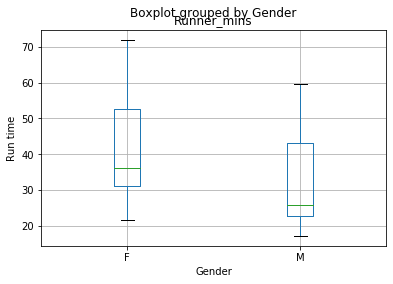

In [41]:
df2.boxplot(column='Runner_mins', by = 'Gender')
plt.ylabel('Run time')

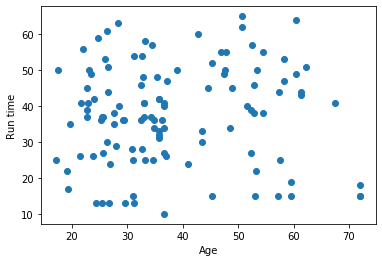

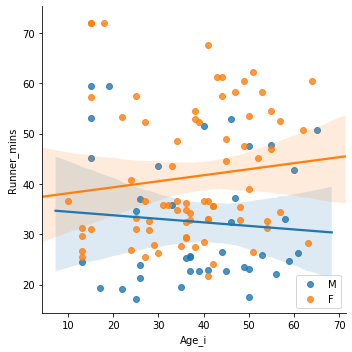

In [42]:
import seaborn as sns, numpy as np
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how ='any', inplace = True)
df = plt.scatter(df2['Runner_mins'], df2['Age_i'])
df = plt.ylabel('Run time')
df= plt.xlabel('Age')
df = plt.show()

sns.lmplot( x='Age_i', y='Runner_mins', data=df2, fit_reg=True, hue='Gender', legend=False)
plt.legend(loc='lower right')

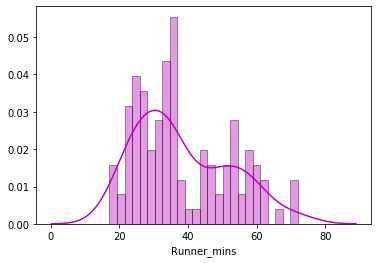

In [43]:
import seaborn as sns, numpy as np
x = df2['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

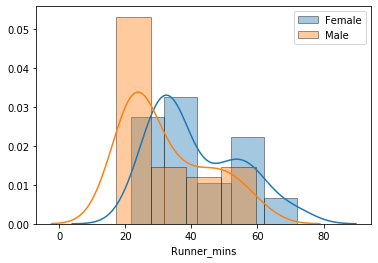

In [44]:
f_fuko = df2.loc[df2['Gender']=='F']['Runner_mins']
m_fuko = df2.loc[df2['Gender']=='M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [46]:
g_stats = df2.groupby("Gender", as_index=True).describe()
print(g_stats)

        Year                                                       \
       count    mean  std     min     25%     50%     75%     max   
Gender                                                              
F       76.0  2016.0  0.0  2016.0  2016.0  2016.0  2016.0  2016.0   
M       39.0  2016.0  0.0  2016.0  2016.0  2016.0  2016.0  2016.0   

       ChipTime_minutes               ... Runner_mins            Age_i  \
                  count         mean  ...         75%        max count   
Gender                                ...                                
F                  76.0  2024.868421  ...   52.550000  72.050000  76.0   
M                  39.0  1947.282051  ...   43.108333  59.516667  39.0   

                                                              
             mean        std   min    25%   50%    75%   max  
Gender                                                        
F       37.131579  13.342006  10.0  27.75  38.0  47.25  64.0  
M       38.538462  14.881720  1

Text(0, 0.5, 'Run time')

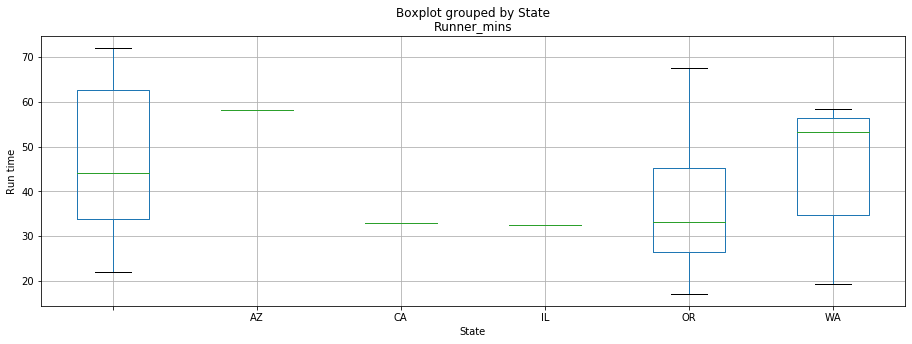

In [47]:
df2.boxplot(column='Runner_mins', by = 'State')
plt.ylabel('Run time')

Text(0, 0.5, 'Run time')

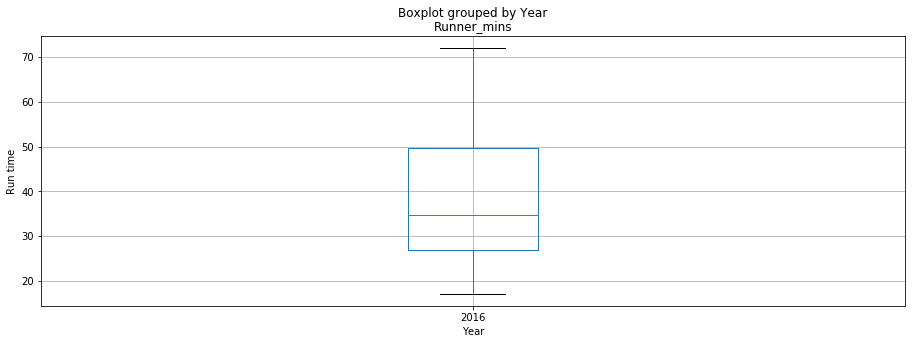

In [48]:
df2.boxplot(column='Runner_mins', by = 'Year')
plt.ylabel('Run time')

In [49]:
df2.to_csv('final2016.csv')